In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

os.environ["OMP_NUM_THREADS"] = "7"

In [2]:
# Path to the directory containing images and annotations
dataset_path = 'C:\\Users\\marco\\Documents\\Machine_Learning\\Cat_Dataset\\CAT_00'

In [3]:
# Function to load images and annotations
def load_data(directory):
    images = []
    annotations = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            # Load image
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            
            # Resize images to a consistent size (e.g., 100x100)
            image = cv2.resize(image, (255, 255))
            
            images.append(image)

            # Load annotation
            annotation_path = os.path.join(directory, filename + ".cat")
            with open(annotation_path, 'r') as file:
                annotation = [float(coord) for coord in file.read().split()]
                annotations.append(annotation)

    return images, annotations

In [4]:
# Load images and annotations
images, annotations = load_data(dataset_path)

# Convert images to NumPy array
images_array = np.array(images)

# Reshape images to 1D array for clustering
images_reshaped = images_array.reshape(images_array.shape[0], -1)

# Standardize data
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_reshaped)

In [5]:
# Apply KMeans clustering with explicit n_init
n_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(images_scaled)

C:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


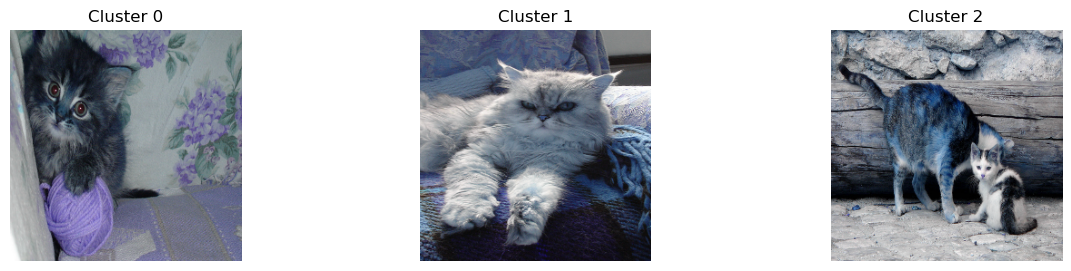

In [6]:
# Visualize results
fig, axes = plt.subplots(1, n_clusters, figsize=(15, 3))

for cluster_id in range(n_clusters):
    cluster_images = images_array[clusters == cluster_id]
    axes[cluster_id].imshow(cluster_images[0])
    axes[cluster_id].axis('off')
    axes[cluster_id].set_title(f'Cluster {cluster_id}')

plt.show()